<a href="https://colab.research.google.com/github/tessamitchell/SchoolBusStopSignDetection/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Data Set Up

In [1]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from skimage.feature import local_binary_pattern
from skimage.feature import haar_like_feature
from skimage.feature import hog

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET

In [ ]:
# X=data
# y=data.labels

!pip install roboflow
from roboflow import Roboflow
from google.colab import userdata

rf = Roboflow(api_key=userdata.get('roboflow'))
project = rf.workspace("myworkspace-hr4qa").project("stop-signs-custom-umjoj")
version = project.version(5)
dataset = version.download("voc")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
project = rf.workspace("myworkspace-hr4qa").project("stop-signs-custom-umjoj")
version = project.version(6)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# https://chatgpt.com/share/692615ef-8958-8010-adfd-24ddd028c3e9
import os
import random

def load_positive_windows(xml_path):
    pos_windows=[]
    neg_windows=[]

    for xml in os.listdir(xml_path):
      if xml.endswith(".xml"):
        img_name=xml.replace('.xml','.jpg')
        img_path = os.path.join(xml_path, img_name)
        if not os.path.exists(img_path):
            continue  # Skip if image file doesn't exist

        img=cv.imread(img_path)
        tree = ET.parse(os.path.join(xml_path, xml))
        root = tree.getroot()

        boxes = []
        for obj in root.findall("object"):
            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text) -1
            ymin = int(bbox.find("ymin").text) -1
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)
            pw=img[ymin:ymax,xmin:xmax]
            pw=cv.resize(pw,(64,64))
            if obj.find("name").text == "stop sign":
              pos_windows.append(pw)
            else:
              neg_windows.append(pw)


            # neg_Windows should have same dimensions as pos window
            # seedx=random.randint(0,1)
            # seedy=random.randint(0,1)
            # xmin_n = random.randrange(0,int(xmin-(xmax-xmin))) if seedx==0 else random.randrange(xmax,(img.shape[0] - (xmax-xmin)))
            # ymin_n=random.randrange(0,int(ymin-(ymax-ymin))) if seedy==0 else random.randrange(ymax,(img.shape[1]-(ymax-ymin)))
            # xmax_n=xmin_n+(xmax-xmin)
            # ymax_n=ymin_n+(ymax-ymin)
            # nw=img[xmin_n:xmax_n,ymin_n:ymax_n]
            # nw=cv.resize(nw,(64,64))
            # neg_windows.append(nw)

    return pos_windows,neg_windows

In [ ]:
pos_images=neg_images=[]

In [ ]:
import glob

xml_path = "/content/Stop-Signs-Custom-5/train/"
# xml_paths = glob.glob("/content/*/*.xml", recursive=True) # for train valid and test xml
pos_images,neg_images=load_positive_windows(xml_path)

In [ ]:
xml_path = "/content/Stop-Signs-Custom-6/train/"
# xml_paths = glob.glob("/content/*/*.xml", recursive=True) # for train valid and test xml
p2,n2=load_positive_windows(xml_path)
pos_images.extend(p2)
neg_images.extend(n2)

# Preprocessing

# Feature Extraction

[sci-kit lbp extraction](https://scikit-image.org/docs/0.25.x/auto_examples/features_detection/plot_local_binary_pattern.html)

In [ ]:
# https://scikit-image.org/docs/0.25.x/auto_examples/features_detection/plot_local_binary_pattern.html

radius=3
n_points=8*radius
METHOD = 'uniform'
def extract_lbp(img):
  res=local_binary_pattern(img,n_points,radius,METHOD)
  return res.flatten()


[scikit haar face extraction](https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_haar_extraction_selection_classification.html)

[haar general additional link](https://scikit-image.org/docs/0.25.x/auto_examples/features_detection/plot_haar.html)

In [ ]:
feature_types = ['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4']
def extract_haar(img):
  haar=haar_like_feature(img,0,0,img.shape[0],img.shape[1])
  return haar

In [ ]:
def extract_hog(img):
  feature=hog(img,orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=False)
  return feature

In [ ]:
def extract_features(img):
  img=img[:,:,2] # extract red color channel, assume OpenCV BGR formatting
  return np.concatenate([extract_lbp(img),extract_haar(img),extract_hog(img)])

72
20


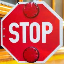

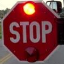

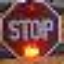

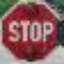

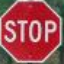

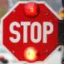

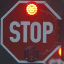

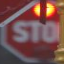

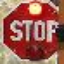

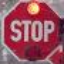

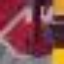

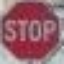

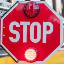

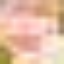

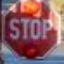

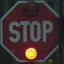

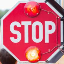

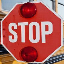

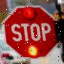

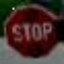

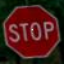

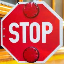

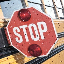

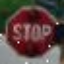

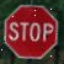

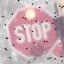

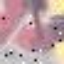

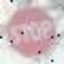

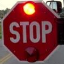

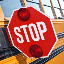

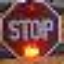

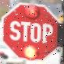

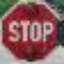

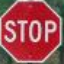

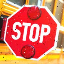

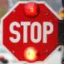

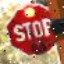

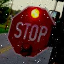

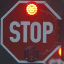

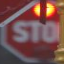

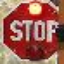

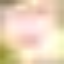

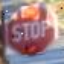

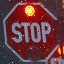

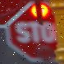

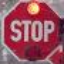

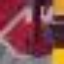

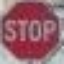

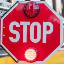

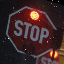

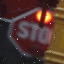

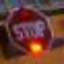

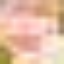

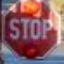

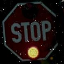

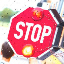

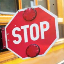

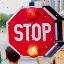

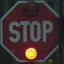

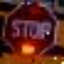

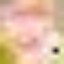

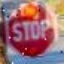

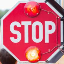

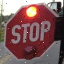

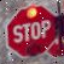

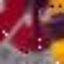

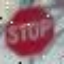

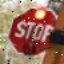

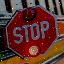

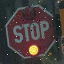

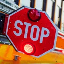

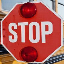

In [ ]:
print(len(pos_images))
print(len(neg_images))
from google.colab.patches import cv2_imshow
for img in pos_images:
  cv2_imshow(img)
# cv2_imshow(pos_images[53])

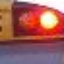

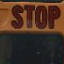

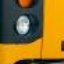

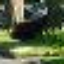

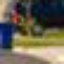

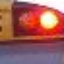

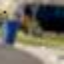

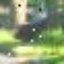

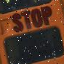

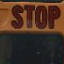

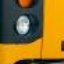

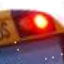

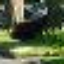

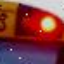

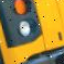

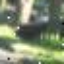

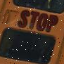

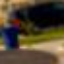

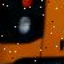

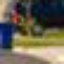

In [ ]:
for img in neg_images:
  cv2_imshow(img)

In [ ]:
X_features=[]
y_labels=[]

for window in pos_images:
  X_features.append(extract_features(window))
  y_labels.append(1)
  print(len(X_features))

for window in neg_images:
  X_features.append(extract_features(window))
  y_labels.append(0)
  print(len(X_features))

import joblib



joblib.dump(X_features, "adaboost_features.pkl")
joblib.dump(y_labels,"adaboost_labels.pkl")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


['adaboost_labels.pkl']

# Training (Adaboost Cascade)

Adding these links here for any tabs I opened in my research that I might want to come back to

[sklearn adaboost tutorial](https://www.datacamp.com/tutorial/adaboost-classifier-python)

[another adaboost tutorial](https://www.kdnuggets.com/2022/10/implementing-adaboost-scikitlearn.html)

[sklearn adaboost documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[adaboost from scratch](https://medium.com/@enozeren/building-the-adaboost-model-from-scratch-with-python-db3a8a763484)

[from scratch G4G](https://www.geeksforgeeks.org/machine-learning/implementing-the-adaboost-algorithm-from-scratch/)

[sklearn pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [2]:
import joblib
X_features=joblib.load("adaboost_features.pkl")
y_labels=joblib.load("adaboost_labels.pkl")

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3,random_state=42) # 70% training and 30% test

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

# Accuracy: 0.8928571428571429

import joblib
joblib.dump(model, "adaboost_model.pkl")



NameError: name 'y_test' is not defined

# Extract Regions of Interest

In [ ]:
def extract_windows(img):
  return x,y,w,h

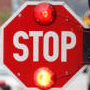

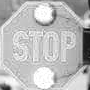

In [ ]:
import cv2 as cv
import numpy as np
testimg=cv.imread("/content/istockphoto-2157367693-612x612.jpg")
cropped=testimg[230:320,260:350]
from google.colab.patches import cv2_imshow
cv2_imshow(cropped)
red=cropped[:,:,2]
cv2_imshow(red)



In [ ]:
features=extract_features(cropped)
model.predict(features)

NameError: name 'extract_features' is not defined

In [ ]:
testimages=[]
positive_windows=[]
for img in testimages:
  windows=extract_windows(img)
  for (x,y,w,h) in windows:
    patch=img[x:x+h,y:y+w]
    features=extract_features(patch)
    if model.predict(features)==1:
      positive_windows.append((img,patch,x,y,w,h))

# Light Detection (Hough Circle Transform)

### Hough Circle Transform

In [ ]:
# documentation https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d
def houghAndValidation(img):
  blurred=cv.medianBlur(img,5)
  h,w=img.shape
  minR=blurred.shape[1]/5
  maxR=blurred.shape[1]/3
  circles = cv.HoughCircles(blurred,cv.HOUGH_GRADIENT,1,20,
                              param1=50,param2=30,minRadius=minR,maxRadius=maxR)

  circles = np.uint16(np.around(circles))
  # validation

  for c in circles:
    # compare radius with bounding box of stop sign

    # get average intensity value and compare to red section of stop sign

    # compare location
    if(c[1]+c[2] < )




In [ ]:
for win in positive_windows:
  hw=houghAndValidation(win)
  drawbounds()


# Outputs

In [ ]:
# https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html
def drawBounds(img,circle,box):
  cv.circle(img,(circle[0],circle[1]),circle[2],(255,0,0),2)
  cv.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,255,0),2)